<a href="https://colab.research.google.com/github/heerakesavan/CE888-Data-Science-and-Decision-making/blob/Master/Lab%206/Lab_6__Task_7__Heera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [ ]:
country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')
dictionary.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [ ]:
X = country.iloc[:,1:]
X.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
scaler=StandardScaler()


In [ ]:
scaled_x = scaler.fit_transform(X)

In [ ]:
pca1 = PCA(n_components=9, random_state=0)
X_pca1 = pca1.fit_transform(scaled_x)

In [ ]:
pca1.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [ ]:
pca1.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

**Explained variance is amout of variance for selected components. The maximum number of components is 9.The explained variance tells us how much information (variance) can be attributed to each of the principal components.In above values first 5 components form most (approx 95%) of the variance and hence remainig can be dropped.**

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(scaled_x)

In [ ]:
km= cluster.KMeans(n_clusters=3)
km.fit(X)
kmeanslabel = km.labels_

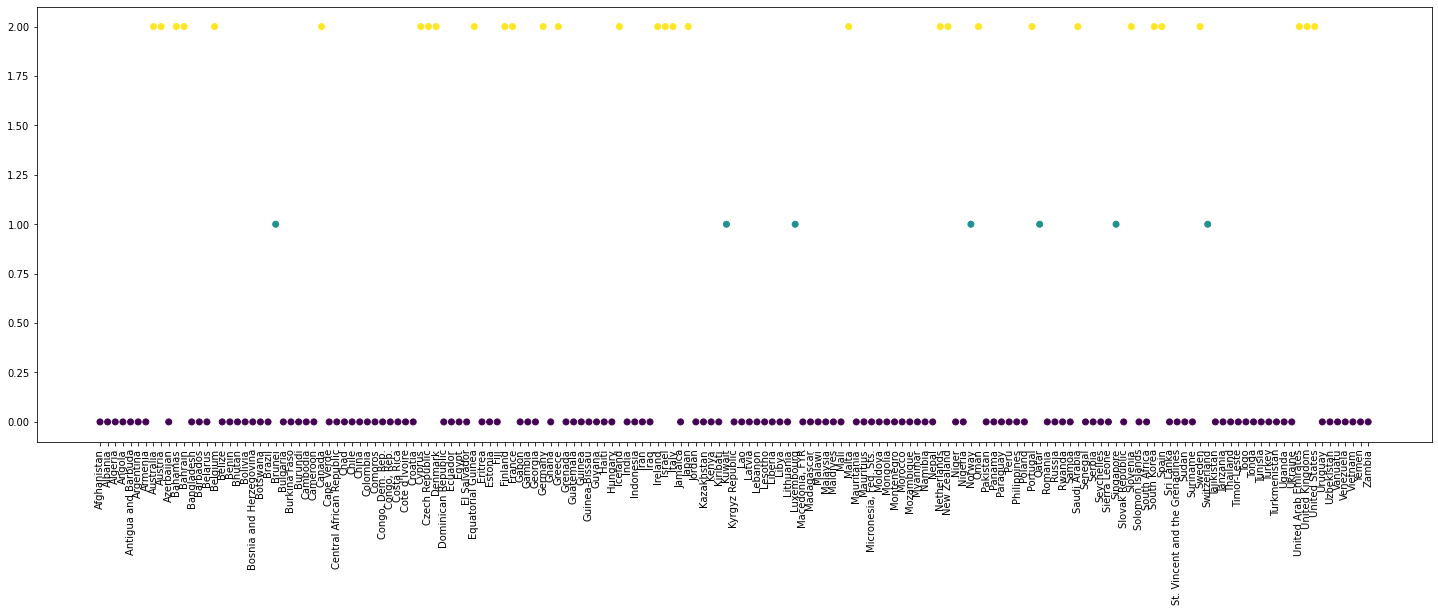

In [ ]:
plt.figure(figsize=(25,8))
plt.scatter(country["country"], kmeanslabel, c=kmeanslabel)
plt.xticks(rotation=90)
plt.show()


In [ ]:
kmeanslabel

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# category=[]
# for j in kmeanslabel:
#   if j==2:
#     category="Developed Country"
#   elif j==1:
#     category="Developing Country"
#   else:
#     category = "Under-developing country"
category = ['Developed Country' if i == 2 else 'Developing Country' if i == 1 else 'Under-developing country' for i in km.labels_]

In [ ]:
result = pd.DataFrame({'country': country['country'], 'Categories': category})

In [ ]:
result.to_csv('kmeanstask7.csv', index=False)

In [ ]:
result.head(25)

,country,Categories
0,Afghanistan,Under-developing country
1,Albania,Under-developing country
2,Algeria,Under-developing country
3,Angola,Under-developing country
4,Antigua and Barbuda,Under-developing country
5,Argentina,Under-developing country
6,Armenia,Under-developing country
7,Australia,Developed Country
8,Austria,Developed Country
9,Azerbaijan,Under-developing country


# New Section